# Random Forest Classification for Twitter Bot Account Detection

## Import libraries

In [551]:
import pandas as pd # to manipulate and use our data from dataset.csv
import shap # explains the importance of features in our model
from sklearn.model_selection import train_test_split # splits our data into model testing and model training 
from sklearn.ensemble import RandomForestClassifier # implements the Random Forest Classifier algorithm for model training
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # metrics to assess performance of our model

## Load Our Dataset

In [552]:
df = pd.read_csv('dataset.csv')
df.head()

,user_id,screen_name,is_bot,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers,...,replies_to_owned,quotes_to_owned,retweets_to_owned,avg_urls,avg_hashtags,identical_tweet_freq,avg_tweet_sentiment,avg_replies_per_follower,avg_likes_per_follower,avg_retweets_per_follower
0,1217628182611927040,boazbaraktcs,0,1778,1,0,0.000,459,18538,0.025,...,0.000,0.865,1.404,0.250,0.000,0.0,0.215,0.083,1.880,0.121
1,36741729,Matthew_Brody,1,5690,0,0,0.000,615,456,1.349,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
2,1679822588,GrianMC,1,4119,0,0,NaN,274,282752,0.001,...,0.009,0.162,0.126,0.189,0.027,0.0,0.306,0.152,3.484,0.111
3,1519144464,NikhilSewdass,0,4183,0,0,0.933,409,191,2.141,...,0.000,0.500,30.250,0.000,0.500,0.0,-0.403,1.309,3.927,1.309
4,15211869,jamie_love,0,6001,1,0,0.000,2616,11106,0.236,...,0.000,0.151,0.453,0.442,0.000,0.0,-0.136,0.089,0.353,0.177


In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1662 entries, 0 to 1661
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         1662 non-null   int64  
 1   screen_name                     1662 non-null   object 
 2   is_bot                          1662 non-null   int64  
 3   account_age                     1662 non-null   int64  
 4   is_blue_verified                1662 non-null   int64  
 5   is_verified                     1662 non-null   int64  
 6   profile_description_sentiment   1300 non-null   float64
 7   following_count                 1662 non-null   int64  
 8   followers_count                 1662 non-null   int64  
 9   following_to_followers          1662 non-null   float64
 10  is_possibly_sensitive           1662 non-null   int64  
 11  is_default_profile_image        1662 non-null   int64  
 12  is_profile_banner               16

## Feature Engineering

### Replace null values with a zero

In [554]:
df.isnull().sum()

user_id                             0
screen_name                         0
is_bot                              0
account_age                         0
is_blue_verified                    0
is_verified                         0
profile_description_sentiment     362
following_count                     0
followers_count                     0
following_to_followers              0
is_possibly_sensitive               0
is_default_profile_image            0
is_profile_banner                   0
is_profile_image_valid              0
tweet_freq                          0
parsed_owned_tweets_count           0
parsed_owned_text_tweets_count      0
parsed_retweets_count               0
likes_freq                          0
media_freq                          0
followers_freq                      0
following_freq                      0
replies_to_owned                    0
quotes_to_owned                     0
retweets_to_owned                   0
avg_urls                            0
avg_hashtags

In [555]:
df.fillna(0, inplace=True)

In [556]:
df.isnull().sum()

user_id                           0
screen_name                       0
is_bot                            0
account_age                       0
is_blue_verified                  0
is_verified                       0
profile_description_sentiment     0
following_count                   0
followers_count                   0
following_to_followers            0
is_possibly_sensitive             0
is_default_profile_image          0
is_profile_banner                 0
is_profile_image_valid            0
tweet_freq                        0
parsed_owned_tweets_count         0
parsed_owned_text_tweets_count    0
parsed_retweets_count             0
likes_freq                        0
media_freq                        0
followers_freq                    0
following_freq                    0
replies_to_owned                  0
quotes_to_owned                   0
retweets_to_owned                 0
avg_urls                          0
avg_hashtags                      0
identical_tweet_freq        

In [557]:
df.head()

,user_id,screen_name,is_bot,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers,...,replies_to_owned,quotes_to_owned,retweets_to_owned,avg_urls,avg_hashtags,identical_tweet_freq,avg_tweet_sentiment,avg_replies_per_follower,avg_likes_per_follower,avg_retweets_per_follower
0,1217628182611927040,boazbaraktcs,0,1778,1,0,0.000,459,18538,0.025,...,0.000,0.865,1.404,0.250,0.000,0.0,0.215,0.083,1.880,0.121
1,36741729,Matthew_Brody,1,5690,0,0,0.000,615,456,1.349,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
2,1679822588,GrianMC,1,4119,0,0,0.000,274,282752,0.001,...,0.009,0.162,0.126,0.189,0.027,0.0,0.306,0.152,3.484,0.111
3,1519144464,NikhilSewdass,0,4183,0,0,0.933,409,191,2.141,...,0.000,0.500,30.250,0.000,0.500,0.0,-0.403,1.309,3.927,1.309
4,15211869,jamie_love,0,6001,1,0,0.000,2616,11106,0.236,...,0.000,0.151,0.453,0.442,0.000,0.0,-0.136,0.089,0.353,0.177


### Drop irrelevent values to training

We want to drop user_id and screen_name as those are irrelevant to bot status. All the parsed_ features are used for calculations of other features. 

In [558]:
df.drop(columns=['user_id', 'screen_name', 'parsed_owned_tweets_count', 'parsed_owned_text_tweets_count', 'parsed_retweets_count'], inplace=True)

In [559]:
df.head()

,is_bot,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers,is_possibly_sensitive,is_default_profile_image,...,replies_to_owned,quotes_to_owned,retweets_to_owned,avg_urls,avg_hashtags,identical_tweet_freq,avg_tweet_sentiment,avg_replies_per_follower,avg_likes_per_follower,avg_retweets_per_follower
0,0,1778,1,0,0.000,459,18538,0.025,0,0,...,0.000,0.865,1.404,0.250,0.000,0.0,0.215,0.083,1.880,0.121
1,1,5690,0,0,0.000,615,456,1.349,0,0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
2,1,4119,0,0,0.000,274,282752,0.001,0,0,...,0.009,0.162,0.126,0.189,0.027,0.0,0.306,0.152,3.484,0.111
3,0,4183,0,0,0.933,409,191,2.141,0,0,...,0.000,0.500,30.250,0.000,0.500,0.0,-0.403,1.309,3.927,1.309
4,0,6001,1,0,0.000,2616,11106,0.236,0,0,...,0.000,0.151,0.453,0.442,0.000,0.0,-0.136,0.089,0.353,0.177


## Isolate and Drop Target Variable

The target variable is what we are trying to predict. In this case is_bot. We want to drop it to ensure the model is trained on input variables and not outcomes.

In [560]:
Y = df.is_bot
Y.head()

0    0
1    1
2    1
3    0
4    0
Name: is_bot, dtype: int64

In [561]:
df.drop('is_bot', inplace=True, axis=1)

In [562]:
df.head()

,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers,is_possibly_sensitive,is_default_profile_image,is_profile_banner,...,replies_to_owned,quotes_to_owned,retweets_to_owned,avg_urls,avg_hashtags,identical_tweet_freq,avg_tweet_sentiment,avg_replies_per_follower,avg_likes_per_follower,avg_retweets_per_follower
0,1778,1,0,0.000,459,18538,0.025,0,0,1,...,0.000,0.865,1.404,0.250,0.000,0.0,0.215,0.083,1.880,0.121
1,5690,0,0,0.000,615,456,1.349,0,0,1,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
2,4119,0,0,0.000,274,282752,0.001,0,0,1,...,0.009,0.162,0.126,0.189,0.027,0.0,0.306,0.152,3.484,0.111
3,4183,0,0,0.933,409,191,2.141,0,0,1,...,0.000,0.500,30.250,0.000,0.500,0.0,-0.403,1.309,3.927,1.309
4,6001,1,0,0.000,2616,11106,0.236,0,0,1,...,0.000,0.151,0.453,0.442,0.000,0.0,-0.136,0.089,0.353,0.177


Now we are just saving the new df without is_bot to X

In [563]:
X = df

In [564]:
X

,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers,is_possibly_sensitive,is_default_profile_image,is_profile_banner,...,replies_to_owned,quotes_to_owned,retweets_to_owned,avg_urls,avg_hashtags,identical_tweet_freq,avg_tweet_sentiment,avg_replies_per_follower,avg_likes_per_follower,avg_retweets_per_follower
0,1778,1,0,0.000,459,18538,0.025,0,0,1,...,0.000,0.865,1.404,0.250,0.000,0.000,0.215,0.083,1.880,0.121
1,5690,0,0,0.000,615,456,1.349,0,0,1,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,4119,0,0,0.000,274,282752,0.001,0,0,1,...,0.009,0.162,0.126,0.189,0.027,0.000,0.306,0.152,3.484,0.111
3,4183,0,0,0.933,409,191,2.141,0,0,1,...,0.000,0.500,30.250,0.000,0.500,0.000,-0.403,1.309,3.927,1.309
4,6001,1,0,0.000,2616,11106,0.236,0,0,1,...,0.000,0.151,0.453,0.442,0.000,0.000,-0.136,0.089,0.353,0.177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,5706,1,0,0.000,504840,786655,0.642,0,0,1,...,0.000,0.000,0.126,0.505,2.036,0.000,0.268,0.020,1.534,0.375
1658,1105,0,0,0.000,93,2,46.500,0,0,0,...,0.000,0.000,0.000,0.400,0.400,0.000,0.000,0.000,100.000,100.000
1659,1173,0,0,0.000,362,23,15.739,0,1,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1660,2515,0,0,0.000,1264,1375,0.919,0,0,1,...,0.000,0.030,2.788,0.818,0.091,0.001,0.439,2.667,54.259,18.865


## Split Data into Test and Training Sets

In [565]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

This sets of data are randomly selected. 70% will go into training and 30% will go into testing. Random state is used to produce the same random outcome.

In [566]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('Y_train: ', Y_train.shape)
print('Y_test: ', Y_test.shape)

X_train:  (1163, 26)
X_test:  (499, 26)
Y_train:  (1163,)
Y_test:  (499,)


## Training Random Forest Classification on Training Set

In [567]:
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
model.fit(X_train.values, Y_train.values)

Index(['account_age', 'is_blue_verified', 'is_verified',
       'profile_description_sentiment', 'following_count', 'followers_count',
       'following_to_followers', 'is_possibly_sensitive',
       'is_default_profile_image', 'is_profile_banner',
       'is_profile_image_valid', 'tweet_freq', 'likes_freq', 'media_freq',
       'followers_freq', 'following_freq', 'replies_to_owned',
       'quotes_to_owned', 'retweets_to_owned', 'avg_urls', 'avg_hashtags',
       'identical_tweet_freq', 'avg_tweet_sentiment',
       'avg_replies_per_follower', 'avg_likes_per_follower',
       'avg_retweets_per_follower'],
      dtype='object')

criterion: How the decision trees are splitting nodes. either 'gini' or 'entropy'.  
n_estimators: The number of decision trees in the forest. we want ~100.  
max_samples: How many rows are being considered in each decision tree. We want all of them, leave empty.  

## Predicting Test Results

In [568]:
y_pred = model.predict(X_test.values)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,

## Confusion Matrix

In [569]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[166  77]
 [ 59 197]]


confusion matrix tells us the results of the testing  

[0][0]: True Negative - Correctly predicted human account  
[0][1]: False Negative - Incorrectly predicted human account   
[1][0]: False Positive - Incorrectly predicted bot account  
[1][1]: True Positive - Correctly predicted bot account  

In [570]:
round(accuracy_score(Y_test, y_pred), 3)

0.727

In [571]:
report = classification_report(Y_test, y_pred, output_dict=True)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       243
           1       0.72      0.77      0.74       256

    accuracy                           0.73       499
   macro avg       0.73      0.73      0.73       499
weighted avg       0.73      0.73      0.73       499



In [572]:
print(f"""
Key Results:

Precision:
- {report["0"]["precision"] * 100:.2f}% of the predictions that were humans were actually humans.
- {report["1"]["precision"] * 100:.2f}% of the predictions that were bots were actually bots.

Recall:
- The model correctly identified {report["0"]["recall"] * 100:.2f}% of humans.
- The model correctly identified {report["1"]["recall"] * 100:.2f}% of bots.

F1 Score:
- Humans: {report["0"]["f1-score"]:.2f}
- Bots: {report["1"]["f1-score"]:.2f}

Support:
- Humans: {report["0"]["support"]} instances in the test set.
- Bots: {report["1"]["support"]} instances in the test set.
""")


Key Results:

Precision:
- 73.78% of the predictions that were humans were actually humans.
- 71.90% of the predictions that were bots were actually bots.

Recall:
- The model correctly identified 68.31% of humans.
- The model correctly identified 76.95% of bots.

F1 Score:
- Humans: 0.71
- Bots: 0.74

Support:
- Humans: 243.0 instances in the test set.
- Bots: 256.0 instances in the test set.



## Use SHAP to Interpret Feature Importance

In [573]:
explainer = shap.TreeExplainer(model)

In [574]:
shap_values = explainer.shap_values(X_test)

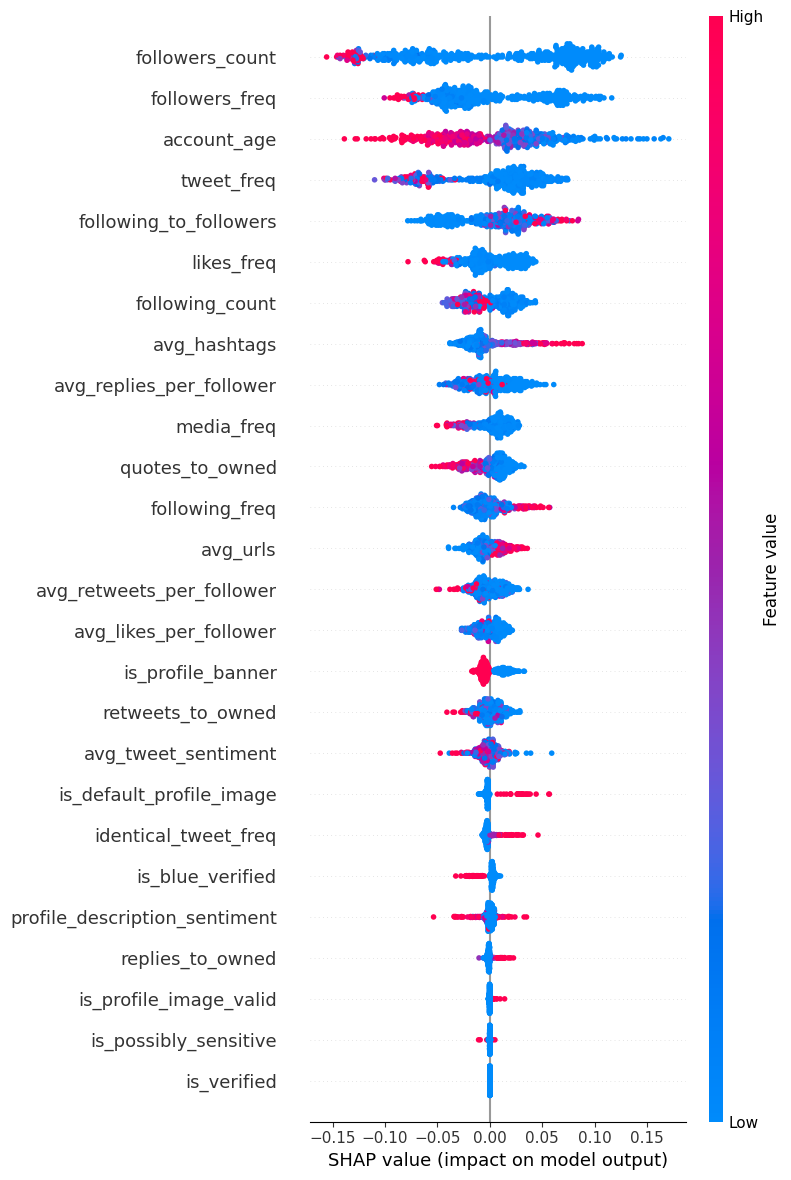

In [575]:
shap.summary_plot(shap_values[:,:,1], X_test, max_display=X_test.shape[1])

This summary plot tells us a few things:  

- Features higher on the list (e.g. followers_count, tweet_freq) are the more important features for the model's prediction.
- The SHAP value of an indivdual point tells us in which direction is the value pointing the model towards (positive values towards a bot, negative values towards a human).
- The color of an individual point tells us the actual value of the point. For example, account_age has a few blue points shifted right meaning that users with a low account age are pushing the model to predict it as a bot.

From the summary plots, we learn that the following aren't having a significant impact:  
- is_verified
- is_possibly_sensitive
- is_profile_image_valid

We can drop these values.  

## Feature Engineering - 2

### Drop More Insignificant Feautres

In [576]:
X.drop(columns=['is_verified' ], inplace=True)

In [577]:
X.head()

,account_age,is_blue_verified,profile_description_sentiment,following_count,followers_count,following_to_followers,is_possibly_sensitive,is_default_profile_image,is_profile_banner,is_profile_image_valid,...,replies_to_owned,quotes_to_owned,retweets_to_owned,avg_urls,avg_hashtags,identical_tweet_freq,avg_tweet_sentiment,avg_replies_per_follower,avg_likes_per_follower,avg_retweets_per_follower
0,1778,1,0.000,459,18538,0.025,0,0,1,0,...,0.000,0.865,1.404,0.250,0.000,0.0,0.215,0.083,1.880,0.121
1,5690,0,0.000,615,456,1.349,0,0,1,0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
2,4119,0,0.000,274,282752,0.001,0,0,1,0,...,0.009,0.162,0.126,0.189,0.027,0.0,0.306,0.152,3.484,0.111
3,4183,0,0.933,409,191,2.141,0,0,1,0,...,0.000,0.500,30.250,0.000,0.500,0.0,-0.403,1.309,3.927,1.309
4,6001,1,0.000,2616,11106,0.236,0,0,1,0,...,0.000,0.151,0.453,0.442,0.000,0.0,-0.136,0.089,0.353,0.177


## Retrain Model

In [578]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
model.fit(X_train.values, Y_train.values)

RandomForestClassifier(criterion='entropy', random_state=0)

## Test Results

In [579]:
y_pred = model.predict(X_test.values)
cm = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix: \n', cm)
print('Accuracy Score: ', round(accuracy_score(Y_test, y_pred), 3))
print('Classification Report: \n', classification_report(Y_test, y_pred))

Confusion Matrix: 
 [[165  78]
 [ 67 189]]
Accuracy Score:  0.709
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.68      0.69       243
           1       0.71      0.74      0.72       256

    accuracy                           0.71       499
   macro avg       0.71      0.71      0.71       499
weighted avg       0.71      0.71      0.71       499



## Save Model

In [580]:
import joblib
joblib.dump(model, 'model.joblib')

['model.joblib']

## Load Model and Test User

In [614]:
loaded_model = joblib.load('model.joblib')
user = X_test.iloc[0]
user

np.float64(4672.0)

## Make Predicition

In [610]:
prediction = loaded_model.predict([user])
probabilities = loaded_model.predict_proba([user])

In [611]:
print(f'Prediction: {prediction}')
print(f'Probabilities: {probabilities}')

Prediction: [1]
Probabilities: [[0.47 0.53]]


This tells us that the model predicted is_bot = 0, with a 95.5% probability.

## Obtain Information About Result

In [589]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(user)

In [605]:
feature_names = X_test.columns.tolist() 
feature_contributions = list(zip(feature_names, shap_values[:, 0 if prediction[0] == 0 else 1]))
feature_contributions.sort(key=lambda x: abs(x[1]), reverse=True)
print(f"Feature Contributions: ")
for feature, contribution in feature_contributions:
    print(f"{feature}: {contribution}")

Feature Contributions: 
followers_count: 0.12361330432052425
account_age: 0.08174361132391429
followers_freq: 0.06614468255640409
tweet_freq: 0.065267535009817
following_to_followers: 0.0492480178312031
media_freq: 0.02198151859732816
is_blue_verified: 0.021223536917909958
likes_freq: 0.012853442062881571
following_freq: -0.010581067344261355
following_count: 0.00922016215393811
avg_retweets_per_follower: 0.007436233154760096
retweets_to_owned: 0.006712467607876169
avg_hashtags: -0.006013049498270931
avg_tweet_sentiment: 0.0042476813501582935
identical_tweet_freq: 0.004226988368433129
avg_likes_per_follower: -0.003903418093227919
is_profile_banner: 0.003457247344875763
profile_description_sentiment: 0.0031725736476549793
avg_replies_per_follower: 0.002046272883033266
is_default_profile_image: 0.0016273002743271861
quotes_to_owned: -0.0003571865248643849
replies_to_owned: 0.00029549666678269976
is_profile_image_valid: 0.00021916550670803274
avg_urls: 4.941358812908576e-05
is_possibly_se

This tells us the user features (in order of importance) that contributed most heavily towards being the result. Positive equals pushes the model toward the result class, negative pushes the model away from the result class.

We just want to get the top three features to display on our app.

## Get Top Three User Features

In [615]:
top_features = {feature: user[feature] for feature, _ in feature_contributions[:3]}
top_features

{'followers_count': np.float64(482.0),
 'account_age': np.float64(4672.0),
 'followers_freq': np.float64(0.103)}

## Return All Statistics Needed

In [617]:
stats = {'prediction': 'human' if prediction[0] == 0 else 'bot', 'probability': probabilities[0][0] if prediction[0] == 0 else 1], 'top_features': top_features}
stats

{'prediction': 'bot',
 'probability': np.float64(0.53),
 'top_features': {'followers_count': np.float64(482.0),
  'account_age': np.float64(4672.0),
  'followers_freq': np.float64(0.103)}}